# Water Quality Analysis

In [1]:
#importing necessary libraries
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
train_f = r"C:\Users\Avaniya\Desktop\Hacathon\waterQuality1.csv"

In [4]:
df = pd.read_csv(train_f)

In [5]:
#view the data using head function
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [6]:
#Dropping the target column
df_w=df.drop(["is_safe"],axis=1)

In [7]:
label=np.where(df['is_safe']=='1',1,0)

In [8]:
print(label)

[1 1 0 ... 1 1 1]


<AxesSubplot:ylabel='count'>

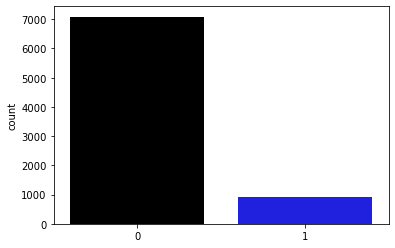

In [9]:
#plotting a graph
seaborn.countplot(x=label,palette= ["#000000","#0000FF"])

In [10]:
df_w.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
dtype: object

In [11]:
df_w["ammonia"]=pd.to_numeric(df_w["ammonia"],errors='coerce')

In [12]:
df_w.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
dtype: object

In [13]:
np.any(np.isnan(df_w))

True

In [14]:
np.where(np.isnan(df_w))

(array([7551, 7568, 7890], dtype=int64), array([1, 1, 1], dtype=int64))

In [15]:
df_w = df_w.fillna(df_w.mean())

In [16]:
np.any(np.isnan(df_w))

False

In [17]:
#Training and Testing split
X_train, X_test, y_train, y_test=train_test_split(df_w, label, train_size=0.8,random_state = 10)

In [18]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
def compute_metrics(data, y_true, model_obj, model):

    # Make predictions
    y_pred = model_obj.predict(data)
    print(metrics.classification_report(y_true, y_pred,target_names = ['Is not safe','Is safe']))
    
    cm = confusion_matrix(y_true, y_pred, labels=model_obj.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Is not safe', 'Is safe'])
    disp.plot(cmap=plt.cm.nipy_spectral)
    plt.show()

              precision    recall  f1-score   support

 Is not safe       0.91      0.98      0.94      5663
     Is safe       0.65      0.25      0.37       736

    accuracy                           0.90      6399
   macro avg       0.78      0.62      0.66      6399
weighted avg       0.88      0.90      0.88      6399



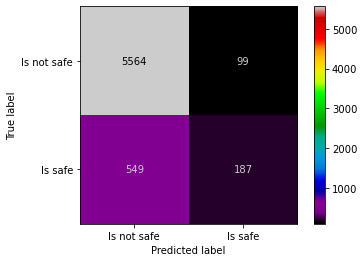

In [20]:
#Training confusion matrix
lr_metrics_train = compute_metrics(X_train, y_train, log_reg, 'LogisticRegression')
lr_metrics_train

              precision    recall  f1-score   support

 Is not safe       0.92      0.98      0.95      1424
     Is safe       0.64      0.28      0.39       176

    accuracy                           0.90      1600
   macro avg       0.78      0.63      0.67      1600
weighted avg       0.89      0.90      0.89      1600



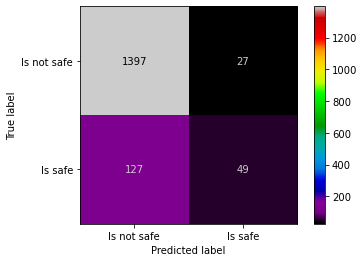

In [21]:
#Testing confusion matrix
lr_metrics_train = compute_metrics(X_test, y_test, log_reg, 'LogisticRegression')
lr_metrics_train

### Saving the model

In [22]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

### Sample data with prediction

In [23]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [24]:
test_f = r"C:\Users\Avaniya\Desktop\Hacathon\Sample.csv"
output_f= "sample_predict_output.csv"

In [25]:
test_df=pd.read_csv(test_f)

In [26]:
def process(sample_df):
    sample_df=sample_df.fillna(sample_df.mean())
    return sample_df

In [27]:
process_df=process(test_df)
test_df["Safe"]=model.predict(process_df)
test_df["Safe"]=np.where(test_df['Safe']==1,"Yes","No")
test_df.to_csv(output_f,index=False)